In [3]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
with open('proj1.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [5]:
df = pd.read_csv('proj1.csv', encoding=encoding,delimiter=';')
df.head()

,Marque,Modèle,Boite vitesse,Puissance fiscale,Transmission,Kilométrage,Mise en circulation,Carrosserie,price,cylindre,Énergie
0,Peugeot,2008,Manuelle,5 cv,Traction,175 000 km,5.2016,SUV/4x4,35 000 DT,1199.0,Essence
1,Chery,Tiggo 2,Manuelle,6 cv,Traction,45 000 km,5.2020,SUV/4x4,49 400 DT,998.0,Essence
2,Volkswagen,Golf 7,Manuelle,5 cv,Traction,145 000 km,6.2013,Berline,46 000 DT,1599.0,Essence
3,Seat,Ibiza,Manuelle,5 cv,Traction,80 000 km,9.2020,Citadine,53 000 DT,999.0,Essence
4,Haval,H6,Automatique,9 cv,Traction,80 000 km,11.2017,SUV/4x4,68 000 DT,1500.0,Essence


In [6]:
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)
df.replace('', pd.NA, inplace=True)

In [7]:
df.shape

(1107, 11)

In [8]:
df.duplicated().sum()

1

In [9]:
df.head()

,Marque,Modèle,Boite vitesse,Puissance fiscale,Transmission,Kilométrage,Mise en circulation,Carrosserie,price,cylindre,Énergie
0,Peugeot,2008,Manuelle,5 cv,Traction,175 000 km,5.2016,SUV/4x4,35 000 DT,1199.0,Essence
1,Chery,Tiggo 2,Manuelle,6 cv,Traction,45 000 km,5.2020,SUV/4x4,49 400 DT,998.0,Essence
2,Volkswagen,Golf 7,Manuelle,5 cv,Traction,145 000 km,6.2013,Berline,46 000 DT,1599.0,Essence
3,Seat,Ibiza,Manuelle,5 cv,Traction,80 000 km,9.2020,Citadine,53 000 DT,999.0,Essence
4,Haval,H6,Automatique,9 cv,Traction,80 000 km,11.2017,SUV/4x4,68 000 DT,1500.0,Essence


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 0 to 1106
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marque               1106 non-null   object 
 1   Modèle               1106 non-null   object 
 2   Boite vitesse        1106 non-null   object 
 3   Puissance fiscale    1106 non-null   object 
 4   Transmission         1106 non-null   object 
 5   Kilométrage          1106 non-null   object 
 6   Mise en circulation  1106 non-null   float64
 7   Carrosserie          1106 non-null   object 
 8   price                1106 non-null   object 
 9   cylindre             1106 non-null   float64
 10  Énergie              1105 non-null   object 
dtypes: float64(2), object(9)
memory usage: 103.7+ KB


In [12]:
def affiche():
  for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

In [13]:
df.columns

Index(['Marque', 'Modèle', 'Boite vitesse', 'Puissance fiscale',
       'Transmission', 'Kilométrage', 'Mise en circulation', 'Carrosserie',
       'price', 'cylindre', 'Énergie'],
      dtype='object')

In [14]:
# Convertir les colonnes en chaînes de caractères
df['Kilométrage'] = df['Kilométrage'].astype(str)
df['price'] = df['price'].astype(str)
df['cylindre'] = df['cylindre'].astype(str)

# Supprimer les espaces et les unités des colonnes
df['Kilométrage'] = df['Kilométrage'].str.replace(' km', '').str.replace(' ', '')
df['price'] = df['price'].str.replace(' DT', '').str.replace(' ', '')
df['cylindre'] = df['cylindre'].str.replace(' cm³', '').str.replace(' ', '')

# Convertir les valeurs de chaque colonne en type numérique
df['Kilométrage'] = pd.to_numeric(df['Kilométrage'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['cylindre'] = pd.to_numeric(df['cylindre'], errors='coerce')

In [15]:
df.head()

,Marque,Modèle,Boite vitesse,Puissance fiscale,Transmission,Kilométrage,Mise en circulation,Carrosserie,price,cylindre,Énergie
0,Peugeot,2008,Manuelle,5 cv,Traction,175000,5.2016,SUV/4x4,35000,1199.0,Essence
1,Chery,Tiggo 2,Manuelle,6 cv,Traction,45000,5.2020,SUV/4x4,49400,998.0,Essence
2,Volkswagen,Golf 7,Manuelle,5 cv,Traction,145000,6.2013,Berline,46000,1599.0,Essence
3,Seat,Ibiza,Manuelle,5 cv,Traction,80000,9.2020,Citadine,53000,999.0,Essence
4,Haval,H6,Automatique,9 cv,Traction,80000,11.2017,SUV/4x4,68000,1500.0,Essence


In [16]:
#df.columns = df.columns.str.lower().str.replace(' ', '_')

#string_columns = list(df.dtypes[df.dtypes == 'object'].index)
#print(string_columns)
#for col in string_columns:
    #df[col] = df[col].str.lower().str.replace(' ', '_')

In [17]:
df.isna().sum()

Marque                 0
Modèle                 0
Boite vitesse          0
Puissance fiscale      0
Transmission           0
Kilométrage            0
Mise en circulation    0
Carrosserie            0
price                  0
cylindre               0
Énergie                1
dtype: int64

In [18]:
# Supprimer les lignes contenant des valeurs NaN dans la colonne "prix"
df = df.dropna(subset=['Énergie'])

# Réinitialiser l'index après avoir supprimé les lignes
df = df.reset_index(drop=True)

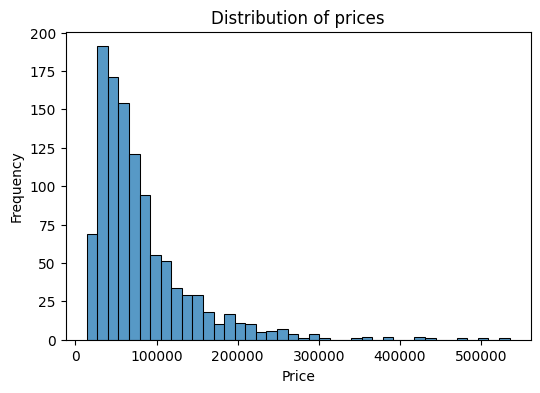

In [19]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 650000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [20]:
df.columns

Index(['Marque', 'Modèle', 'Boite vitesse', 'Puissance fiscale',
       'Transmission', 'Kilométrage', 'Mise en circulation', 'Carrosserie',
       'price', 'cylindre', 'Énergie'],
      dtype='object')

In [21]:
import re

# Fonction pour extraire les chiffres de la chaîne
def extract_digits(string):
    return int(re.search(r'\d+', string).group())

# Appliquer la fonction à la colonne 'Puissance fiscale'
df['Puissance fiscale'] = df['Puissance fiscale'].apply(extract_digits)

In [22]:
df.head()

,Marque,Modèle,Boite vitesse,Puissance fiscale,Transmission,Kilométrage,Mise en circulation,Carrosserie,price,cylindre,Énergie
0,Peugeot,2008,Manuelle,5,Traction,175000,5.2016,SUV/4x4,35000,1199.0,Essence
1,Chery,Tiggo 2,Manuelle,6,Traction,45000,5.2020,SUV/4x4,49400,998.0,Essence
2,Volkswagen,Golf 7,Manuelle,5,Traction,145000,6.2013,Berline,46000,1599.0,Essence
3,Seat,Ibiza,Manuelle,5,Traction,80000,9.2020,Citadine,53000,999.0,Essence
4,Haval,H6,Automatique,9,Traction,80000,11.2017,SUV/4x4,68000,1500.0,Essence


In [23]:
df = df.drop(["Boite vitesse" ], axis=1)

In [24]:
df.columns

Index(['Marque', 'Modèle', 'Puissance fiscale', 'Transmission', 'Kilométrage',
       'Mise en circulation', 'Carrosserie', 'price', 'cylindre', 'Énergie'],
      dtype='object')

In [25]:
df.to_csv('Cleaned_Car_data.csv')

In [26]:
df.describe()

,Puissance fiscale,Kilométrage,Mise en circulation,price,cylindre
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,7.764706,116490.686878,6.689440,82687.157466,1578.682353
std,4.077690,79625.322560,3.510036,67480.794908,646.601186
min,4.000000,0.000000,1.197200,14000.000000,898.000000
25%,5.000000,60000.000000,3.202100,42000.000000,1199.000000
50%,7.000000,100000.000000,7.201100,64000.000000,1498.000000
75%,9.000000,158000.000000,9.202200,98000.000000,1600.000000
max,47.000000,876000.000000,12.202300,748000.000000,7000.000000


In [27]:
X=df[['Marque', 'Modèle', 'Puissance fiscale', 'Transmission', 'Kilométrage',
       'Mise en circulation', 'Carrosserie', 'cylindre', 'Énergie']]
y=df['price']


In [28]:
X

,Marque,Modèle,Puissance fiscale,Transmission,Kilométrage,Mise en circulation,Carrosserie,cylindre,Énergie
0,Peugeot,2008,5,Traction,175000,5.2016,SUV/4x4,1199.0,Essence
1,Chery,Tiggo 2,6,Traction,45000,5.2020,SUV/4x4,998.0,Essence
2,Volkswagen,Golf 7,5,Traction,145000,6.2013,Berline,1599.0,Essence
3,Seat,Ibiza,5,Traction,80000,9.2020,Citadine,999.0,Essence
4,Haval,H6,9,Traction,80000,11.2017,SUV/4x4,1500.0,Essence
...,...,...,...,...,...,...,...,...,...
1100,Volkswagen,Golf 7,20,Intégrale,57000,8.2019,Autres,1984.0,Essence
1101,Mercedes-Benz,GLC Coupé,10,Intégrale,22000,5.2022,SUV/4x4,2000.0,Essence
1102,Volkswagen,Tiguan,8,Traction,69000,8.2021,SUV/4x4,1400.0,Hybride essence
1103,Land Rover,Range Rover Sport,19,Traction,114000,9.2015,SUV/4x4,3000.0,Essence


In [29]:
y.shape

(1105,)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [31]:
df.columns

Index(['Marque', 'Modèle', 'Puissance fiscale', 'Transmission', 'Kilométrage',
       'Mise en circulation', 'Carrosserie', 'price', 'cylindre', 'Énergie'],
      dtype='object')

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Colonne : {col}")
    print(unique_values)
    print()


Colonne : Marque
['Peugeot' 'Chery' 'Volkswagen' 'Seat' 'Haval' 'Ssangyong' 'Mercedes-Benz'
 'Mini' 'Ford' 'Fiat' 'BMW' 'Chevrolet' 'Renault' 'Nissan' 'Toyota' 'Tata'
 'KIA' 'Audi' 'Mitsubishi' 'Hyundai' 'MG' 'Opel' 'Citroën' 'Mahindra'
 'Geely' 'Alfa Romeo' 'Suzuki' 'Great Wall' 'Lancia' 'Mazda' 'Dacia'
 'Honda' 'Skoda' 'Jeep' 'Cupra' 'DFSK' 'Porsche' 'Iveco' 'Land Rover'
 'Jaguar' 'Abarth' 'Tesla' 'Lada' 'Smart' 'Infiniti' 'BAIC YX' 'Volvo'
 'DS' 'Dongfeng' 'Isuzu' 'Wallyscar' 'Dodge']

Colonne : Modèle
['2008' 'Tiggo 2' 'Golf 7' 'Ibiza' 'H6' 'Actyon Sports' 'Classe E'
 'Countryman' 'Focus' 'T-Cross' '3 portes' 'Punto Evo' 'Fiesta' 'Série 3'
 '500' 'Cruze' '208' 'Sonic' 'Fluence' 'Série 4 Gran Coupé' 'Patrol'
 'Polo' 'Aygo' 'ML' 'C-Max' 'Golf 5' 'Xenon X2 Simple Cabine' '508' 'X5'
 'Navara' 'Sportage' 'A4' '307' 'Mirage' 'Tiguan' 'Tucson' 'Clio' 'X1'
 'Série 3 coupé' 'Tiggo 8 Pro' 'CLA' 'ZS' 'Prado' 'Tiggo 3X' 'Leon' 'Figo'
 'Antara' 'Ecosport' 'DS3' 'Qashqai' 'KUV 100' 'GC6' 'C3' 'P

In [33]:
df.columns

Index(['Marque', 'Modèle', 'Puissance fiscale', 'Transmission', 'Kilométrage',
       'Mise en circulation', 'Carrosserie', 'price', 'cylindre', 'Énergie'],
      dtype='object')

In [34]:
ohe=OneHotEncoder()
X.fillna('', inplace=True)
ohe.fit(X[['Énergie','Transmission', 'Carrosserie',
       'Marque', 'Modèle']])

<ipython-input-34-4569f2753fda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('', inplace=True)


OneHotEncoder()

In [35]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Énergie','Transmission', 'Carrosserie',
       'Marque', 'Modèle']),
                                    remainder='passthrough')

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), LinearRegression())
# Supprimer les lignes avec des valeurs manquantes dans la colonne spécifiée

# Filtrer les valeurs correspondantes dans y_train
y_train = y_train[X_train.index]
# Ensuite, vous pouvez ajuster votre pipeline comme avant

pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Diesel', 'Electrique', 'Essence', 'Hybride diesel',
       'Hybride essence', 'Hybride rechargeable diesel',
       'Hybride rechargeable essence'], dtype=object),
                                                                            array(['Intégrale', 'Propulsion', 'Traction'], dtype=object),
                                                                            array(['Autr...
       'Transporter Combi 6.1', 'Tucson', 'Tucson Hybride', 'Veloster',
       'Verso', 'Vitara', 'Wrangler', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6',
       'XC40', 'XE', 'XF', 'XJ', 'XLV', 'XUV 300',
       'Xenon X2 Simple Cabine', 'Yaris', 'Yaris Sedan', 'Ypsilon', 'ZS',
       'i10', 'i20'], dtype=object)]),
                                                  ['Énergie', 'Transmission',
                                                   'Carrosserie', 'Marque',
                                                   'Modèle'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [38]:
y_pred=pipe.predict(X_test)

In [39]:
r2_score(y_test,y_pred)

0.6458771875315905

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
scores=[]
scores1=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)

    pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), LinearRegression())



    y_train = y_train[X_train.index]

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    scores1.append(mean_absolute_error(y_test,y_pred))

KeyboardInterrupt: 

In [ ]:
scores[np.argmax(scores)]

In [ ]:
scores1[np.argmin(scores1)]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))

pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), LinearRegression())
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:

mean_absolute_error(y_test,y_pred)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# Créer une nouvelle caractéristique en combinant 'marque' et 'modèle'
df['marque_modele'] = df['Marque'] + '_' + df['Modèle']

In [ ]:
df['Mise en circulation'].unique()

In [ ]:
# Calculer l'âge de la voiture à partir de la colonne 'mise_en_circulation'
#df['age'] = 2024 - pd.to_datetime(df['Mise en circulation'], format='%m.%Y').dt.year
df['Mise en circulation'] = (df['Mise en circulation'] % 1 * 10000).astype(int)

# Supprimer les colonnes 'mise_en_circulation', 'marque' et 'modèle' après l'extraction des informations
df.drop(columns=['Marque', 'Modèle'], inplace=True)


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
X1=df[['Puissance fiscale', 'Transmission', 'Kilométrage',
       'Mise en circulation', 'Carrosserie', 'cylindre', 'Énergie',
       'marque_modele']]
y1=df['price']

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2)

In [ ]:
ohe1=OneHotEncoder()
X1.fillna('', inplace=True)
ohe1.fit(X1[['Énergie','Transmission', 'Carrosserie',
       'marque_modele']])

In [ ]:
column_trans1=make_column_transformer((OneHotEncoder(categories=ohe1.categories_),['Énergie',
     'Transmission', 'Carrosserie',
       'marque_modele']),
                                    remainder='passthrough')

In [ ]:
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression())
# Supprimer les lignes avec des valeurs manquantes dans la colonne spécifiée
#X_train1 = X_train1.dropna(subset=['marque_modele'])
# Filtrer les valeurs correspondantes dans y_train
#y_train1 = y_train1[X_train1.index]
# Ensuite, vous pouvez ajuster votre pipeline comme avant

pipe1.fit(X_train1 , y_train1)


In [ ]:
y_pred1=pipe1.predict(X_test1)
r2_score(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test1,y_pred1)

In [ ]:
scores=[]
scores1=[]
for i in range(1000):
    X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.1,random_state=i)

    pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression())

    #X_train1 = X_train1.dropna(subset=['marque_modele'])

    #y_train1 = y_train1[X_train1.index]

    pipe1.fit(X_train1,y_train1)
    y_pred1=pipe1.predict(X_test1)
    scores.append(r2_score(y_test1,y_pred1))
    scores1.append(mean_absolute_error(y_test,y_pred))



In [ ]:
scores[np.argmax(scores)]

In [ ]:
scores1[np.argmin(scores1)]

In [ ]:
#from sklearn.model_selection import cross_val_score

#scores = []

#for i in range(1000):
    #X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=i)

    #pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression())

    # Calculer les scores de validation croisée
    #cv_scores = cross_val_score(pipe1, X_train1, y_train1, cv=5, scoring='r2')

    # Ajouter le score moyen de validation croisée à la liste des scores
    #cores.append(cv_scores.mean())

# Afficher le score moyen de validation croisée
#print("Score moyen de validation croisée:", np.mean(scores))

In [ ]:

from sklearn.ensemble import BaggingRegressor


In [ ]:
from sklearn.utils import check_array

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.1,random_state=np.argmax(scores))
# Définition du pipeline avec prétraitement des caractéristiques
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression())

# Définition de la grille des hyperparamètres
param_grid = {
    'linearregression__fit_intercept': [True, False],  # Hyperparamètre pour l'interception
    'linearregression__positive': [True, False],  # Hyperparamètre pour la contrainte de positivité des coefficients
    'linearregression__copy_X': [True, False],  # Hyperparamètre pour copier X
    'linearregression__n_jobs': [-1]  # Nombre de jobs à exécuter en parallèle (-1 pour utiliser tous les processeurs)
    # Vous pouvez ajouter d'autres hyperparamètres pertinents ici
}


# Création du grid search
grid_search = GridSearchCV(pipe1, param_grid, cv=5, scoring='r2')

# Entraînement du modèle avec la recherche sur grille
grid_search.fit(X_train1, y_train1)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Évaluation des performances du modèle sur le jeu de données de test
test_score = grid_search.score(X_test1, y_test1)
print("Score R2 sur le jeu de données de test:", test_score)


In [ ]:
scores=[]
scores1=[]
for i in range(1000):
    X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.1,random_state=i)

    pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, positive=False))

    #X_train1 = X_train1.dropna(subset=['marque_modele'])

    #y_train1 = y_train1[X_train1.index]

    pipe1.fit(X_train1,y_train1)
    y_pred1=pipe1.predict(X_test1)
    scores.append(r2_score(y_test1,y_pred1))
    scores1.append(mean_absolute_error(y_test,y_pred))

In [ ]:
scores[np.argmax(scores)]

In [ ]:
scores1[np.argmin(scores1)]

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.1,random_state=np.argmax(scores))

pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, positive=False))

    #X_train1 = X_train1.dropna(subset=['marque_modele'])

    #y_train1 = y_train1[X_train1.index]

pipe1.fit(X_train1,y_train1)
y_pred1=pipe1.predict(X_test1)
r2_score(y_test1,y_pred1)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



# Define your pipeline with the column transformer and your model
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), LinearRegression())

# Define the lists to store the scores
models = {
    "Linear Regression": pipe1,
    "Random Forest": make_pipeline(column_trans1,  StandardScaler(with_mean=False),RandomForestRegressor()),
    "Gradient Boosting": make_pipeline(column_trans1,  StandardScaler(with_mean=False),GradientBoostingRegressor()),
    "Decision Trees": make_pipeline(column_trans1, StandardScaler(with_mean=False), DecisionTreeRegressor()),
    "XGBoost": make_pipeline(column_trans1, StandardScaler(with_mean=False), XGBRegressor())
}

# Initialize variables to store the best model and its metrics
best_model_name = None
min_mse_across_models = float('inf')
min_mae_across_models = float('inf')
max_r2_across_models = -float('inf')

# Iterate over each model
for model_name, model in models.items():
    scores_mse = []
    scores_r2 = []
    scores_mae = []

    print(f"Model: {model_name}")

    for i in range(500):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store the metrics
        scores_mse.append(mse)
        scores_r2.append(r2)
        scores_mae.append(mae)

        # Print the scores for each iteration
        print(f"Iteration {i+1}: MSE={mse}, R2={r2}, MAE={mae}")

    # Find the minimum MSE for the current model
    min_mse_model = min(scores_mse)
    min_mae_model = min(scores_mae)
    max_r2_model = max(scores_r2)

    # Check if the minimum MSE for the current model is less than the minimum MSE across all models
    if min_mse_model < min_mse_across_models:
        min_mse_across_models = min_mse_model
        best_model_name = model_name
        min_mae_across_models = min_mae_model
        max_r2_across_models = max_r2_model

# Print the best model based on the minimum MSE across all models
print(f"\nThe best model based on minimum Mean Squared Error (MSE) across all models is: {best_model_name}")
print(f"Minimum MSE: {min_mse_across_models}")
print(f"Corresponding MAE: {min_mae_across_models}")
print(f"Corresponding R2: {max_r2_across_models}")


In [ ]:
best_model_name

Iteration 261: MSE=386719657.39760107, R2=0.7921306497168978, MAE=13355.973920036764

Iteration 375: MSE=408611009.6278569, R2=0.8289366036912682, MAE=12671.476765766403

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=374)
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False),XGBRegressor())

# Entraîner le modèle sur l'ensemble d'entraînement
pipe1.fit(X_train1, y_train1)

# Prédictions sur l'ensemble de test
y_pred = pipe1.predict(X_test1)

# Calcul des métriques
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"MAE: {mae}")


In [ ]:
y_test1-y_pred

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=494)
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False),GradientBoostingRegressor(n_estimators=2600,learning_rate=0.1,max_depth=3))

# Entraîner le modèle sur l'ensemble d'entraînement
pipe1.fit(X_train1, y_train1)

# Prédictions sur l'ensemble de test
y_pred = pipe1.predict(X_test1)

# Calcul des métriques
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"MAE: {mae}")


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define your pipeline with preprocessing steps
pipe1 = make_pipeline(column_trans1, StandardScaler(with_mean=False), GradientBoostingRegressor(n_estimators=2600, learning_rate=0.1, max_depth=3, random_state=69))

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=494)

# Train the model on the training set
pipe1.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = pipe1.predict(X_test1)

# Calculate evaluation metrics
r2_test_score = r2_score(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)
mse = mean_squared_error(y_test1, y_pred)

# Print the evaluation metrics
print("R-squared Score on Test Data:", r2_test_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=494)

# Apply the column transformation on the training data
x_train_transformed = column_trans1.fit_transform(x_train)

# Define the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', column_trans1),  # Using the pre-defined column_trans1
    #('scaler', StandardScaler(with_mean=False)),
    ('regressor', GradientBoostingRegressor(random_state=69))
])

# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [2600],
    'regressor__learning_rate': [0.1],
    'regressor__max_depth': [3]
    # Add more parameters to tune
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(x_train)
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
r2_test_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared Score on Test Data:", r2_test_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score on the training data
r2_train_score = r2_score(y_pred_train, y_train)
print("R-squared Score on Training Data:", r2_train_score)


In [ ]:
X1.isna().sum()

In [ ]:
df.info()

In [ ]:
df1=df

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming x and y are your feature and target matrices respectively

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=494)

# Apply the column transformation on the training and testing data
x_train_transformed = column_trans1.fit_transform(x_train)
x_test_transformed = column_trans1.transform(x_test)

# Initialize and fit the MaxAbsScaler to the training data
scaler = MaxAbsScaler()
scaler.fit(x_train_transformed)
x_train_scaled = scaler.transform(x_train_transformed)
x_test_scaled = scaler.transform(x_test_transformed)

# Define the model with default parameters
model = GradientBoostingRegressor(random_state=69)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [2600],  # Adjust as needed
    'learning_rate': [0.1],  # Adjust as needed
    'max_depth': [3],  # Adjust as needed
    # Add more parameters to tune
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(x_train_scaled)
y_pred = best_model.predict(x_test_scaled)

# Calculate evaluation metrics
r2_test_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared Score on Test Data:", r2_test_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score on the training data
r2_train_score = r2_score(y_pred_train, y_train)
print("R-squared Score on Training Data:", r2_train_score)


In [ ]:
pipe1

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

# Divisez les données en ensembles d'entraînement et de test
x_train_val, x_test, y_train_val, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Divisez les données restantes en ensembles d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Entraînez votre pipeline sur l'ensemble d'entraînement
pipe1.fit(x_train, y_train)

# Évaluez le modèle avec la validation croisée
cv_scores = cross_val_score(pipe1, x_train_val, y_train_val, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Évaluez le modèle sur l'ensemble de test indépendant
test_score = pipe1.score(x_test, y_test)
print("Test set score:", test_score)
